# Initial Data Import & Review

In [1]:
#Import Libraries
import numpy as np
import pandas as pd

import geopandas as gpd
from shapely.geometry import Point, Polygon
from descartes import PolygonPatch

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv("kc_house_data.csv")  

#drop presumptively irrelevant columns (viewed, prop. id, and date sold)
df = df.loc(axis=1)['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                    'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 
                    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
                    'sqft_living15', 'sqft_lot15', 'lat', 'long']

df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         NaN   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0          3      7        1180           0.0      1955           0.0   
1          3      7        2170         400.0      1951        1991.0   
2          3      6         770           0.0      1933           NaN   
3          5      7        1050         910.0      1965           0.0   
4          3      8        1680           0.0      1987           0.0   

   zipcode  sqft_living15  sqft_lot15      lat     long  
0    98178           1340        5650  47.5112 -122.257  
1    98125           1690        7639  47.7210 -122.319  
2    98028           2720        8062  47.7379 -122.233  
3    98136           1360        5000  47.5208 -122.393  
4    98074           1800        7503  47.6168 -122.045

In [3]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21597.000000  19221.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      3.409825      7.657915   1788.596842   
std        0.539683      0.086825      0.650546      1.173200    827.759761   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

           yr_built  yr_renovated       zipcode  sqft_living15     sqft_lot15  \
count  21597.000000  17755.000000  21597.000000   21597.000000   21597.000000   
mean    1970.999676     83.636778  98077.951845    1986.620318   12758.283512   
std       29.375234    399.946414     53.513072     685.230472   27274.441950   
min     1900.000000      0.000000  98001.000000     399.000000     651.000000   
25%     1951.000000      0.000000  98033.000000    1490.000000    5100.000000   
50%     1975.000000      0.000000  98065.000000    1840.000000    7620.000000   
75%     1997.000000      0.000000  98118.000000    2360.000000   10083.000000   
max     2015.000000   2015.000000  98199.000000    6210.000000  871200.000000   

                lat          long  
count  21597.000000  21597.000000  
mean      47.560093   -122.213982  
std        0.138552      0.140724  
min       47.155900   -122.519000  
25%       47.471100   -122.328000  
50%       47.571800   -122.231000  
75%       47.678000   -122.125000  
max       47.777600   -121.315000

# How Are the Properties Distributed? 

## How is the data geographically spread across King County, WA? 

In [4]:
df['price_sqft'] = df['price']/df['sqft_living']
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         NaN   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   condition  grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0          3      7        1180           0.0      1955           0.0   
1          3      7        2170         400.0      1951        1991.0   
2          3      6         770           0.0      1933           NaN   
3          5      7        1050         910.0      1965           0.0   
4          3      8        1680           0.0      1987           0.0   

   zipcode  sqft_living15  sqft_lot15      lat     long  price_sqft  
0    98178           1340        5650  47.5112 -122.257  188.050847  
1    98125           1690        7639  47.7210 -122.319  209.338521  
2    98028           2720        8062  47.7379 -122.233  233.766234  
3    98136           1360        5000  47.5208 -122.393  308.163265  
4    98074           1800        7503  47.6168 -122.045  303.571429

In [5]:
KCo_map = gpd.read_file('King_County_Political_Boundary_no_waterbodies__kingco_area.shp')
# designate coordinate system
crs = {'init':'espc:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)

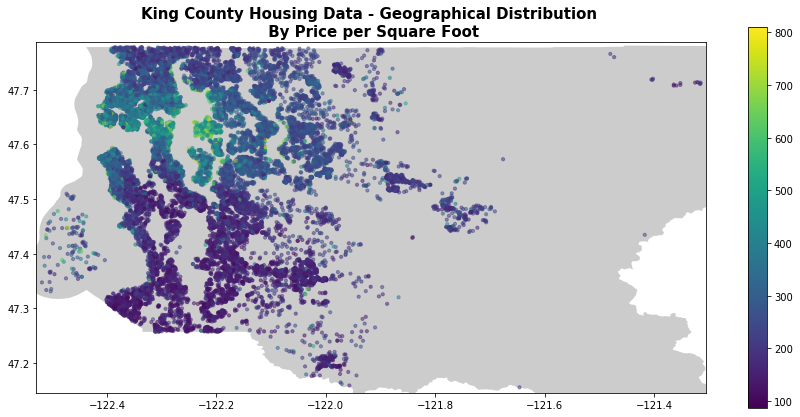

In [6]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,7))
# add .shp mapfile to axes
KCo_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column=df['price_sqft'],ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('King County Housing Data - Geographical Distribution \n By Price per Square Foot', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(df.long.min()-0.01,df.long.max()+0.01)
plt.ylim(df.lat.min()-0.01, df.lat.max()+0.01)

# show map
plt.show()

The data set mostly includes western King County (the Seattle area), though there area few sales from the more rural areas to the east).  The higher price-per-square-foot areas are focused on the down-town Seattle area, while the lower-priced areas are spread outside of this area.

## How does price per square foot vary by zip code?  

Do the zip codes contain any predictive value based upon the properties' price per square foot? 

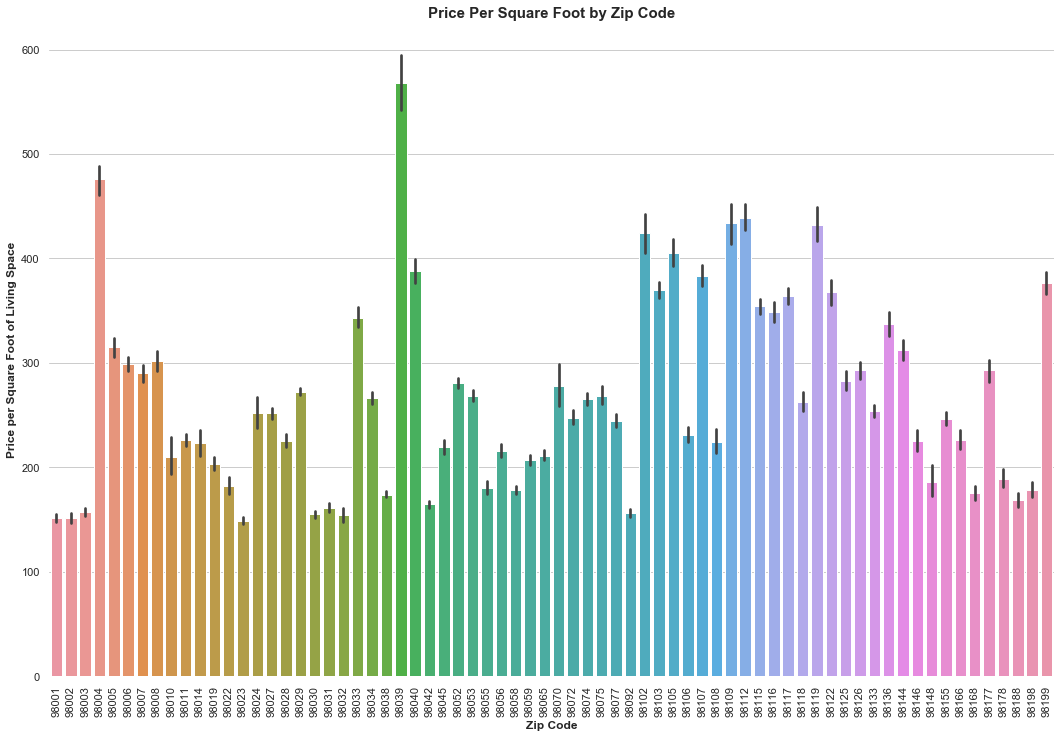

In [7]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("muted")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="zipcode", y="price_sqft", data=df, ax=ax)
ax.set_title("Price Per Square Foot by Zip Code", fontsize=15,fontweight='bold')
ax.set_xlabel("Zip Code", fontsize=12,fontweight='bold')
ax.set_ylabel("Price per Square Foot of Living Space", fontsize=12,fontweight='bold')
plt.xticks(rotation=90)

plt.show()

Price per square foot varies greatly by zip code.  Which specific ones are higher or lower doesn't matter as much as the fact that they're significantly different; the zip codes are going to be significant categorical predictors.

## Further Data Review:

#### Review value counts for each column, along with min/max of each:

In [8]:
for col in df.columns:  
    print(col, '\n', df[col].value_counts(normalize=True).head(20), 
    '\n Min:', df[col].min(), '  Max:', df[col].max(),'  \n\n')

price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
325000.0    0.006853
400000.0    0.006714
375000.0    0.006390
300000.0    0.006158
525000.0    0.006066
250000.0    0.006019
475000.0    0.005556
330000.0    0.005510
650000.0    0.005417
275000.0    0.005232
415000.0    0.005140
315000.0    0.005140
390000.0    0.005093
600000.0    0.005093
440000.0    0.005047
Name: price, dtype: float64 
 Min: 78000.0   Max: 7700000.0   


bedrooms 
 3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9     0.000278
10    0.000139
11    0.000046
33    0.000046
Name: bedrooms, dtype: float64 
 Min: 1   Max: 33   


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
1.50    0.066907
2.75    0.054869
3.00    0.034866
3.50    0.033847
3.25    0.027272
3.75    0.007177
4.00    0.006297
4.50    0.004630
4.25    0.003658
0.75    0.0

AttributeError: 'GeometryArray' object has no attribute 'value_counts'

#### Examine the data for the presence and quantity of NaN entries:

In [9]:
df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
sqft_living15    False
sqft_lot15       False
lat              False
long             False
price_sqft       False
geometry         False
dtype: bool

In [10]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
lat                 0
long                0
price_sqft          0
geometry            0
dtype: int64

#### Noted: 
.info shows presence of some NaN entries. </p>
.describe shows some issues with the number of bedrooms (33 as the max), either as an outlier or placeholder. 



#### Analysis of Results: 
NaN entries appear in the waterfront column and the yr_renovated column.  For waterfront, the vast majority (over 99%) are "0.0".  While the waterfront homes are in the minority, they will likely play a significant role in the ultimate value of a home (though we'll determine this when selecting the most predictive features for the model).  Accordingly, I don't think we're skewing the data to significantly at all to change the NaN entries to "0.0."  

In contrast, the "yr_renovated" series is all over the place.  The vast majority are "0.0," suggesting that they were never renovated (or there is no data on a renovation), and that it likely will not have a beneficial effect on the ultimate model.  Accordingly, I believe it would be best to drop this column. 

The high bedrooms (33) is clearly an outlier, but there are also other entries with between 7-11 bedrooms.  Those houses with 1-6 bedrooms make up 99.7129% of the properties reviewed; considering the relative rarity for houses with more than six bedrooms, it makes sense to limit the dataset to properties with six for fewer bedrooms.  

Finally, we'll use zip code for location issues in the model, and will drop lat/long from the current dataframe.

#### Cleaning up NaNs in Waterfront and Yr_Renovated, and Limiting Data to 6 and Fewer Bedrooms:

In [11]:
#replace waterfront NaNs with 0.0
df['waterfront'].fillna(value = 0.0, inplace = True)

df.drop(columns = ['yr_renovated', 'lat', 'long'], inplace = True)

#limit dataset to properties with less than six bedrooms
df = df.loc[df['bedrooms'] < 7.0]

df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.153500e+04  21535.000000  21535.000000  21535.000000  2.153500e+04   
mean   5.390889e+05      3.359786      2.111400   2075.221779  1.509742e+04   
std    3.652086e+05      0.875090      0.762291    909.693683  4.142101e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.210000e+05      3.000000      1.750000   1420.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.615000e+03   
75%    6.430000e+05      4.000000      2.500000   2540.000000  1.066750e+04   
max    7.700000e+06      6.000000      8.000000  12050.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21535.000000  21535.000000  21535.000000  21535.000000  21535.000000   
mean       1.493360      0.006780      3.409705      7.656280   1785.243836   
std        0.539494      0.082061      0.650431      1.171862    823.245932   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1190.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2210.000000   
max        3.500000      1.000000      5.000000     13.000000   8860.000000   

           yr_built       zipcode  sqft_living15     sqft_lot15    price_sqft  
count  21535.000000  21535.000000   21535.000000   21535.000000  21535.000000  
mean    1971.039053  98077.929557    1985.835663   12759.793220    264.208051  
std       29.359903     53.523854     684.596314   27274.117437    109.977981  
min     1900.000000  98001.000000     399.000000     651.000000     87.588235  
25%     1951.000000  98033.000000    1490.000000    5100.000000    182.352941  
50%     1975.000000  98065.000000    1840.000000    7620.000000    244.755245  
75%     1997.000000  98118.000000    2360.000000   10081.500000    318.428403  
max     2015.000000  98199.000000    6210.000000  871200.000000    810.138889

### Confirm NaN Entries Have Been Addressed:

In [12]:
df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
zipcode          False
sqft_living15    False
sqft_lot15       False
price_sqft       False
geometry         False
dtype: bool

## Further data review via Matrix:
Looking for other variables which do not appear to have any predictive qualities and which may be categorical, needing one-hot encoding. 

In [13]:
sns.set(style="white")
#sns.pairplot(df)

In [14]:
for i in df:
    print (i, ':', df[i].nunique(), 'unique values')

price : 3615 unique values
bedrooms : 6 unique values
bathrooms : 28 unique values
sqft_living : 1028 unique values
sqft_lot : 9756 unique values
floors : 6 unique values
waterfront : 2 unique values
condition : 5 unique values
grade : 11 unique values
sqft_above : 939 unique values
sqft_basement : 302 unique values
yr_built : 116 unique values
zipcode : 70 unique values
sqft_living15 : 776 unique values
sqft_lot15 : 8672 unique values
price_sqft : 16440 unique values
geometry : 20757 unique values


## Matrix Review / Addressing Categorical Variables:

The matrix also shows a number of potential categorical variables: bedrooms, bathrooms, floors, waterfront, condition, and grade. While thse look categorical, they are ordinal and shoudl be treated as continuous.  The truly categorical variables are waterfront and zipcode.  These will be converted using one-hot encoding. 

The non-categorical variables generally display adequate linearity, with the exceptions of yr_built, sqft_lot, and sqft_lot15. None of these were ultimately used in the model.  

First, we'll create the dummy variables for the dummy variables:

In [15]:
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

In [16]:
df = df.drop(['waterfront', 'zipcode'], axis=1)
df = pd.concat([df, waterfront_dummies, zipcode_dummies], axis=1)

In [17]:
#the decimal was causing issues; removing it removed the issue.
df.rename({'water_1.0':'water_1'}, axis=1, inplace=True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'price_sqft', 'geometry', 'water_1',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_9812

## Check for Multicollinearity:
(Using a 75% cutoff and Heatmap)

In [18]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.313566   0.525273     0.701430  0.089269  0.254498   
bedrooms       0.313566  1.000000   0.523199     0.593303  0.034940  0.183149   
bathrooms      0.525273  0.523199   1.000000     0.753889  0.087239  0.504106   
sqft_living    0.701430  0.593303   0.753889     1.000000  0.171603  0.352717   
sqft_lot       0.089269  0.034940   0.087239     0.171603  1.000000 -0.005553   
floors         0.254498  0.183149   0.504106     0.352717 -0.005553  1.000000   
condition      0.034651  0.024199  -0.126711    -0.060469 -0.008632 -0.265328   
grade          0.667514  0.373691   0.668597     0.765086  0.113781  0.458338   
sqft_above     0.603433  0.493839   0.684786     0.875747  0.182659  0.523592   
yr_built       0.056726  0.173813   0.514249     0.323749  0.052504  0.492021   
sqft_living15  0.584767  0.414222   0.572510     0.759180  0.143796  0.279065   
sqft_lot15     0.082208  0.033682   0.087315     0.182574  0.717488 -0.011541   
price_sqft     0.556902 -0.217337  -0.090278    -0.091975 -0.034606  0.004041   
water_1        0.266527 -0.000989   0.064761     0.106220  0.021489  0.020947   
zip_98002     -0.080605 -0.003659  -0.034487    -0.047507 -0.017673 -0.028497   
zip_98003     -0.076992 -0.000347  -0.009648    -0.018464 -0.012454 -0.038858   
zip_98004      0.269895  0.060917   0.061911     0.108482 -0.005820 -0.013968   
zip_98005      0.065848  0.049794   0.036376     0.056690  0.010343 -0.035108   
zip_98006      0.134752  0.081203   0.088529     0.135719 -0.006346 -0.010160   
zip_98007      0.016175  0.035479   0.004105     0.007708 -0.008964 -0.013035   
zip_98008      0.033465  0.047865  -0.003571     0.006867 -0.013632 -0.067105   
zip_98010     -0.021587 -0.005447  -0.007518     0.004683  0.066568 -0.001691   
zip_98011     -0.012750  0.020639   0.020918     0.018692 -0.008731  0.001631   
zip_98014     -0.017394 -0.031289  -0.006291     0.003576  0.150302  0.001506   
zip_98019     -0.029522  0.000364   0.022203     0.009992  0.056355  0.039820   
zip_98022     -0.063675 -0.024021  -0.026472    -0.027352  0.149318 -0.032826   
zip_98023     -0.106423  0.011451  -0.010057    -0.014475 -0.017206 -0.048451   
zip_98024      0.007864 -0.001555   0.006346     0.019322  0.129200 -0.007738   
zip_98027      0.029550  0.025429   0.066675     0.066383  0.059665  0.045804   
zip_98028     -0.024204  0.015927   0.004800     0.006026 -0.008809 -0.015586   
zip_98029      0.024775  0.009419   0.076157     0.028260 -0.019060  0.104157   
zip_98030     -0.072953  0.017575   0.007297    -0.013591 -0.008788  0.002144   
zip_98031     -0.074078  0.017919   0.006582    -0.018128 -0.008182 -0.010531   
zip_98032     -0.060214  0.002813  -0.040436    -0.028321 -0.008703 -0.038717   
zip_98033      0.103848  0.031424   0.040991     0.047978 -0.015887  0.001144   
zip_98034     -0.007691  0.018355   0.002193    -0.017695 -0.020734 -0.052598   
zip_98038     -0.078977  0.015645   0.058129     0.013469  0.041788  0.076738   
zip_98039      0.211357  0.034938   0.066857     0.089662  0.002524  0.005104   
zip_98040      0.205601  0.084908   0.089566     0.128450 -0.003846  0.002173   
zip_98042     -0.100572  0.008161   0.003122    -0.016598  0.015110  0.001167   
zip_98045     -0.027501 -0.013801   0.001207    -0.000530  0.086085  0.002106   
zip_98052      0.048102  0.048589   0.054956     0.052470 -0.015883  0.026886   
zip_98053      0.050659 -0.022597   0.060634     0.078515  0.066004  0.041445   
zip_98055     -0.072125 -0.019692  -0.025871    -0.036279 -0.013609 -0.023901   
zip_98056     -0.044740  0.010659  -0.012497    -0.009140 -0.018487 -0.015721   
zip_98058     -0.074613  0.027415  -0.002197    -0.004133  0.015683 -0.029614   
zip_98059     -0.018298  0.058112   0.045044     0.052939 -0.002458  0.036733   
zip_98065     -0.003120  0.025558   0.069873     0.066631  0.005932  0.085939   
zip_98070     -0.010060 -0.049158  -0.019503    -

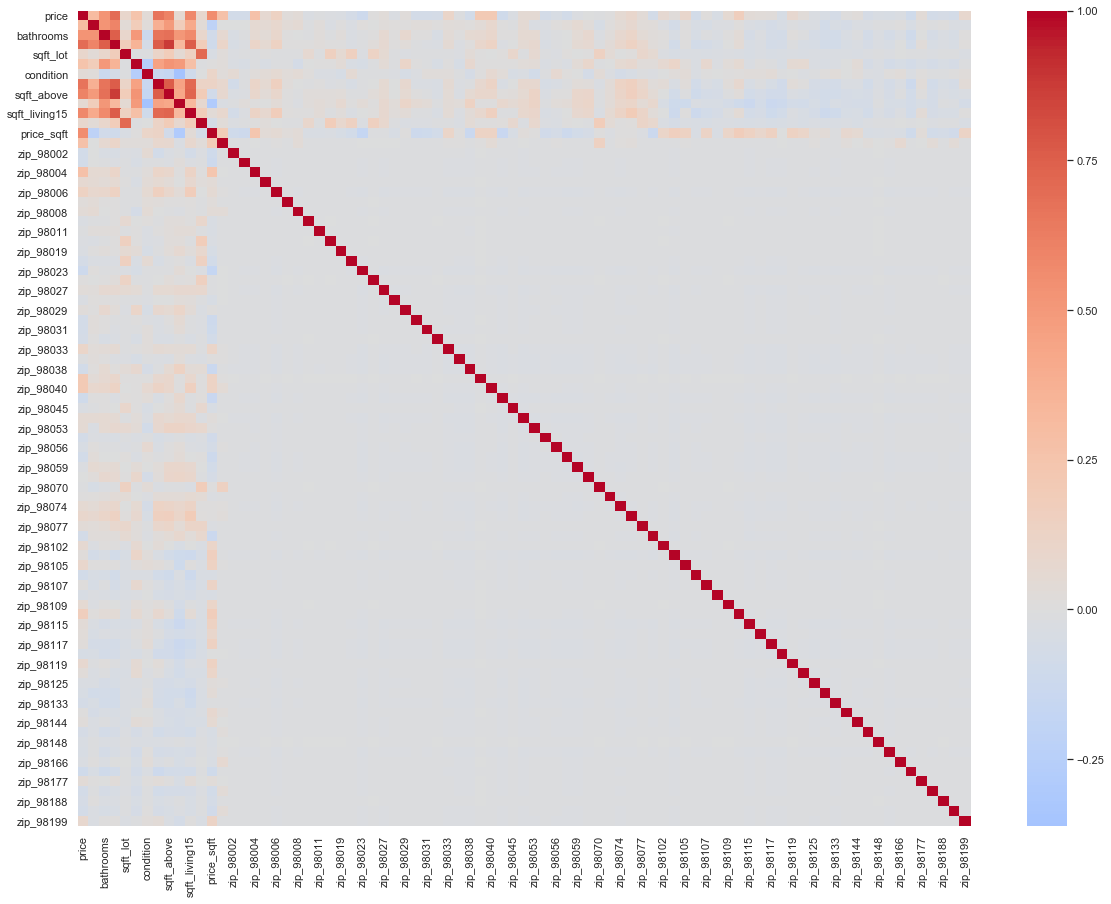

In [19]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), center=0, cmap='coolwarm')

### Analysis:
There is multicollinearity (not unexpectedly) between the property's square footage and the square footage not including the basement (approx. 88%), far exceeding a customary 75% cutoff.  Also, sqft_living15 (sq. footage of the 15 nearest properties) and grade also exceed the cutoff, showing multicollinearity with sqft_living, though to a much less degree. Finally, it just doesn't make logical sense to keep the neighbors' plot sizes if we're dropping their living space square footage; accordingly, we'll drop that variable, as well as the preceding three. 

In [20]:
df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'grade'], axis = 1)

## Normality of Feature Distribution

The following features do not appear to be normally distributed in the matrix above: sqft_living, sqft_lot, and sqft_lot_15.  For comparison's sake, larger histograms of each are shown below, and then they'll be log-transformed and re-plotted.

In [21]:
pre_transform = ['price', 'sqft_living', 'sqft_lot']
df['log_price'] = df['price']
df['log_sqft_living'] = df['sqft_living']
df['log_sqft_lot'] = df['sqft_lot']

log_transform = ['log_price', 'log_sqft_living', 'log_sqft_lot']

for i in log_transform:
    df[i] = df[i].map(lambda x: np.log(x))
 

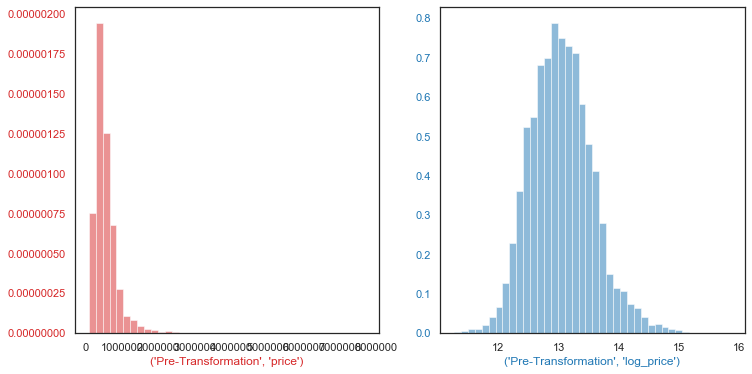

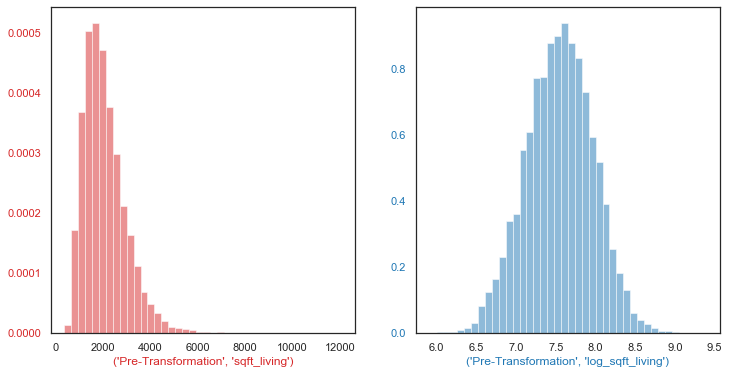

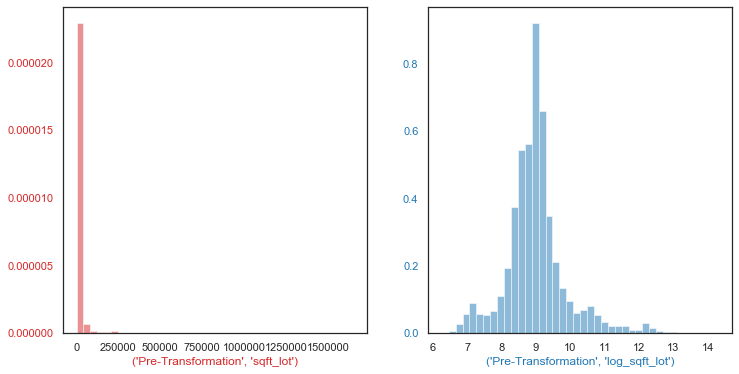

In [22]:
for i in range(len(pre_transform)):
    
    newfig = plt.figure(num=2, figsize = (12,6))
    ax_pre = newfig.add_subplot(1,2,1)
    ax_post = newfig.add_subplot(1,2,2)
    
    color = 'tab:red'
    ax_pre.set_xlabel(('Pre-Transformation', pre_transform[i]),  color=color)
    ax_pre.hist(df[pre_transform[i]], bins=40, density = True, alpha = 0.5, color=color)
    ax_pre.tick_params(axis='y', labelcolor=color)
    
    color2 = 'tab:blue'
    ax_post.set_xlabel(('Pre-Transformation', log_transform[i]), color=color2)
    ax_post.hist(df[log_transform[i]], bins=40, density = True,  alpha = 0.5, color=color2)
    ax_post.tick_params(axis='y', labelcolor=color2)

    plt.show()
    


#### Review: 
Each of the "non-normal" elements now appears to have a more-normal distribution.

## Feature Scaling

Feature scaling is not a formal problem in linear regression, and won't be addressed here.

# Model Creation & Revision

In [28]:
Y = df.log_price
features = df.drop(['price', 'geometry', 'log_price','sqft_basement', 'price_sqft', 'sqft_living', 'sqft_lot'], axis = 1)
#price_sqft was not original data, and was drived from the Y; it was raising the R-squared 
#by well over 10 points.

In [29]:
features.info()
#features.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 77 columns):
bedrooms           21535 non-null int64
bathrooms          21535 non-null float64
floors             21535 non-null float64
condition          21535 non-null int64
yr_built           21535 non-null int64
water_1            21535 non-null uint8
zip_98002          21535 non-null uint8
zip_98003          21535 non-null uint8
zip_98004          21535 non-null uint8
zip_98005          21535 non-null uint8
zip_98006          21535 non-null uint8
zip_98007          21535 non-null uint8
zip_98008          21535 non-null uint8
zip_98010          21535 non-null uint8
zip_98011          21535 non-null uint8
zip_98014          21535 non-null uint8
zip_98019          21535 non-null uint8
zip_98022          21535 non-null uint8
zip_98023          21535 non-null uint8
zip_98024          21535 non-null uint8
zip_98027          21535 non-null uint8
zip_98028          21535 non-null uint8
zip_980

I could have used sm.add_constant(features) to make entering the model much easier.  However, that makes the summary much more difficult to read.  So, I took the features.columns output above, ran it through a Word find/replace to make the list into the correct format for function below:

In [30]:
formula = 'Y ~ bedrooms + bathrooms + floors + condition + yr_built + water_1 + zip_98002 + zip_98003 + zip_98004 + zip_98005 + zip_98006 + zip_98007 + zip_98008 + zip_98010 + zip_98011 + zip_98014 + zip_98019 + zip_98022 + zip_98023 + zip_98024 + zip_98027 + zip_98028 + zip_98029 + zip_98030 + zip_98031 + zip_98032 + zip_98033 + zip_98034 + zip_98038 + zip_98039 + zip_98040 + zip_98042 + zip_98045 + zip_98052 + zip_98053 + zip_98055 + zip_98056 + zip_98058 + zip_98059 + zip_98065 + zip_98070 + zip_98072 + zip_98074 + zip_98075 + zip_98077 + zip_98092 + zip_98102 + zip_98103 + zip_98105 + zip_98106 + zip_98107 + zip_98108 + zip_98109 + zip_98112 + zip_98115 + zip_98116 + zip_98117 + zip_98118 + zip_98119 + zip_98122 + zip_98125 + zip_98126 + zip_98133 + zip_98136 + zip_98144 + zip_98146 + zip_98148 + zip_98155 + zip_98166 + zip_98168 + zip_98177 + zip_98178 + zip_98188 + zip_98198 + zip_98199 + log_sqft_living + log_sqft_lot'
model = ols(formula = formula, data = features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1550.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:17:53   Log-Likelihood:                 3553.7
No. Observations:               21535   AIC:                            -6951.
Df Residuals:                   21457   BIC:                            -6329.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.2435      0.163     38.316      0.000       5.924       6.563
bedrooms           -0.0409      0.002    -18.857      0.000      -0.045      -0.037
bathrooms           0.0624      0.003     18.935      0.000       0.056       0.069
floors              0.0430      0.004     11.912      0.000       0.036       0.050
condition           0.0363      0.002     15.018      0.000       0.032       0.041
yr_built            0.0003   7.74e-05      3.334      0.001       0.000       0.000
water_1             0.7188      0.018     40.944      0.000       0.684       0.753
zip_98002          -0.0181      0.018     -0.993      0.321      -0.054       0.018
zip_98003           0.0543      0.016      3.317      0.001       0.022       0.086
zip_98004           1.2460      0.016     77.936      0.000       1.215       1.277
zip_98005           0.8136      0.019     42.200      0.000       0.776       0.851
zip_98006           0.7777      0.014     54.260      0.000       0.750       0.806
zip_98007           0.7183      0.021     34.849      0.000       0.678       0.759
zip_98008           0.7222      0.016     43.977      0.000       0.690       0.754
zip_98010           0.2196      0.023      9.420      0.000       0.174       0.265
zip_98011           0.4744      0.018     25.935      0.000       0.439       0.510
zip_98014           0.2571      0.022     11.904      0.000       0.215       0.299
zip_98019           0.2893      0.018     15.662      0.000       0.253       0.325
zip_98022           0.0699      0.017      4.024      0.000       0.036       0.104
zip_98023           0.0065      0.014      0.461      0.645      -0.021       0.034
zip_98024           0.4042      0.026     15.784      0.000       0.354       0.454
zip_98027           0.5489      0.015     36.890      0.000       0.520       0.578
zip_98028           0.4414      0.016     27.016      0.000       0.409       0.473
zip_98029           0.6778      0.016     42.643      0.000       0.647       0.709
zip_98030           0.0580      0.017      3.450      0.001       0.025       0.091
zip_98031           0.0786      0.016      4.765      0.000       0.046       0.111
zip_98032           0.0056      0.021      0.261      0.794      -0.036       0.047
zip_98033           0.8628      0.015     58.647      0.000       0.834       0.892
zip_98034           0.5807      0.014     41.516      0.000       0.553       0.608
zip_98038           0.1658      0.014     12.035      0.000       0.139       0.193
zip_98039           1.4592      0.031     46.392      0.000       1.398       1.521
zip_98040           1.0299      0.017     62.264      0.000       0.997       1.062
zip_98042           0.0740      0.014      5.307      0.000       0.047       0.101
zip_98045           0.3206      0.018     18.156      0.000

## Feature Selection

Running stepwise selection to determine which features should remain in the model:

In [31]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [32]:
result = stepwise_selection(features, Y, verbose=True)
print('resulting features:')
print(result)

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  floors                         with p-value 0.0
Add  log_sqft_living                with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  zip_98004                      with p-value 4.47078e-251
Add  zip_98023                      with p-value 2.13755e-175
Add  zip_98042                      with p-value 2.10893e-133
Add  water_1                        with p-value 1.01087e-128
Add  zip_98040                      with p-value 3.04218e-123
Add  bedrooms                       with p-value 1.54192e-116
Add  bathrooms                      with p-value 2.9537e-132
Add  zip_98033                      with p-value 6.05119e-112
Add  zip_98092                      with p-value 8.55269e-106
Add  zip_98002                      with p-value 7.17599e-111
Add  zip_98038                      with p-value 2.97098e-116
Add  zip_98168                      with p-value 1.36812e-121
Add  zip_98003                      with p-value 6.78497e-125
Add  zip_98030                      

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  condition                      with p-value 3.49637e-40
Add  zip_98118                      with p-value 7.07747e-43
Drop yr_built                       with p-value 0.880189
Add  zip_98133                      with p-value 1.67524e-41
Add  zip_98072                      with p-value 4.6719e-30
Add  zip_98155                      with p-value 4.26446e-31
Drop zip_98146                      with p-value 0.107349
Add  zip_98077                      with p-value 5.05334e-25
Add  zip_98011                      with p-value 1.40733e-21
Add  zip_98065                      with p-value 1.25319e-22
Add  zip_98028                      with p-value 4.67174e-26
Add  zip_98059                      with p-value 1.32193e-18
Add  zip_98106                      with p-value 8.53062e-20
Add  zip_98056                      with p-value 2.06027e-17
Add  zip_98108                      with p-value 1.94355e-20
Add  zip_98166                      with p-value 1.76475e-20
Add  zip_98146                 

## Re-fit the Model with Selected Features

1. Create a new set of features from those selected in the stepwise selection
2. Re-fit the model

In [34]:
selected_features = features.filter(['floors', 'log_sqft_living', 'zip_98004', 'zip_98023', 'zip_98042', 'water_1', 'zip_98040', 'bedrooms', 'bathrooms', 'zip_98033', 'zip_98002', 'zip_98112', 'zip_98032', 'zip_98039', 'zip_98199', 'zip_98105', 'zip_98119', 'zip_98115', 'zip_98103', 'zip_98117', 'zip_98006', 'zip_98109', 'zip_98107', 'zip_98122', 'zip_98102', 'zip_98116', 'log_sqft_lot', 'zip_98052', 'zip_98144', 'zip_98136', 'zip_98005', 'zip_98008', 'zip_98075', 'zip_98177', 'zip_98074', 'zip_98029', 'zip_98053', 'zip_98007', 'zip_98034', 'zip_98126', 'zip_98125', 'zip_98027', 'condition', 'zip_98118', 'zip_98133', 'zip_98072', 'zip_98155', 'zip_98077', 'zip_98011', 'zip_98065', 'zip_98028', 'zip_98059', 'zip_98106', 'zip_98056', 'zip_98108', 'zip_98166', 'zip_98146', 'zip_98045', 'zip_98024', 'zip_98019', 'zip_98070', 'zip_98014', 'zip_98058', 'zip_98038', 'zip_98010', 'zip_98178', 'zip_98055', 'zip_98148', 'zip_98198', 'yr_built', 'zip_98188'], axis = 1)

selected_features.columns

Index(['floors', 'log_sqft_living', 'zip_98004', 'zip_98023', 'zip_98042',
       'water_1', 'zip_98040', 'bedrooms', 'bathrooms', 'zip_98033',
       'zip_98002', 'zip_98112', 'zip_98032', 'zip_98039', 'zip_98199',
       'zip_98105', 'zip_98119', 'zip_98115', 'zip_98103', 'zip_98117',
       'zip_98006', 'zip_98109', 'zip_98107', 'zip_98122', 'zip_98102',
       'zip_98116', 'log_sqft_lot', 'zip_98052', 'zip_98144', 'zip_98136',
       'zip_98005', 'zip_98008', 'zip_98075', 'zip_98177', 'zip_98074',
       'zip_98029', 'zip_98053', 'zip_98007', 'zip_98034', 'zip_98126',
       'zip_98125', 'zip_98027', 'condition', 'zip_98118', 'zip_98133',
       'zip_98072', 'zip_98155', 'zip_98077', 'zip_98011', 'zip_98065',
       'zip_98028', 'zip_98059', 'zip_98106', 'zip_98056', 'zip_98108',
       'zip_98166', 'zip_98146', 'zip_98045', 'zip_98024', 'zip_98019',
       'zip_98070', 'zip_98014', 'zip_98058', 'zip_98038', 'zip_98010',
       'zip_98178', 'zip_98055', 'zip_98148', 'zip_98198', 'y

Taking the above columns, search/replace in Word, and then introducing them as the set of features when revising the model:

In [35]:
formula = 'Y ~ floors + log_sqft_living + zip_98004 + zip_98023 + zip_98042 + water_1 + zip_98040 + bedrooms + bathrooms + zip_98033 + zip_98002 + zip_98112 + zip_98032 + zip_98039 + zip_98199 + zip_98105 + zip_98119 + zip_98115 + zip_98103 + zip_98117 + zip_98006 + zip_98109 + zip_98107 + zip_98122 + zip_98102 + zip_98116 + log_sqft_lot + zip_98052 + zip_98144 + zip_98136 + zip_98005 + zip_98008 + zip_98075 + zip_98177 + zip_98074 + zip_98029 + zip_98053 + zip_98007 + zip_98034 + zip_98126 + zip_98125 + zip_98027 + condition + zip_98118 + zip_98133 + zip_98072 + zip_98155 + zip_98077 + zip_98011 + zip_98065 + zip_98028 + zip_98059 + zip_98106 + zip_98056 + zip_98108 + zip_98166 + zip_98146 + zip_98045 + zip_98024 + zip_98019 + zip_98070 + zip_98014 + zip_98058 + zip_98038 + zip_98010 + zip_98178 + zip_98055 + zip_98148 + zip_98198 + yr_built + zip_98188'
model = ols(formula = formula, data = selected_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1678.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:30:34   Log-Likelihood:                 3537.2
No. Observations:               21535   AIC:                            -6930.
Df Residuals:                   21463   BIC:                            -6356.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3344      0.161     39.280      0.000       6.018       6.650
floors              0.0430      0.004     11.929      0.000       0.036       0.050
log_sqft_living     0.6321      0.006     98.874      0.000       0.620       0.645
zip_98004           1.1949      0.013     94.673      0.000       1.170       1.220
zip_98023          -0.0444      0.010     -4.312      0.000      -0.065      -0.024
zip_98042           0.0232      0.010      2.333      0.020       0.004       0.043
water_1             0.7188      0.018     40.916      0.000       0.684       0.753
zip_98040           0.9789      0.013     73.527      0.000       0.953       1.005
bedrooms           -0.0410      0.002    -18.895      0.000      -0.045      -0.037
bathrooms           0.0627      0.003     19.020      0.000       0.056       0.069
zip_98033           0.8119      0.011     74.013      0.000       0.790       0.833
zip_98002          -0.0694      0.015     -4.519      0.000      -0.099      -0.039
zip_98112           1.1357      0.014     80.119      0.000       1.108       1.163
zip_98032          -0.0456      0.019     -2.404      0.016      -0.083      -0.008
zip_98039           1.4082      0.030     47.107      0.000       1.350       1.467
zip_98199           0.9372      0.013     73.056      0.000       0.912       0.962
zip_98105           1.0208      0.015     67.598      0.000       0.991       1.050
zip_98119           1.0787      0.016     65.469      0.000       1.046       1.111
zip_98115           0.8413      0.010     82.889      0.000       0.821       0.861
zip_98103           0.8644      0.010     83.075      0.000       0.844       0.885
zip_98117           0.8431      0.010     80.682      0.000       0.823       0.864
zip_98006           0.7268      0.010     69.542      0.000       0.706       0.747
zip_98109           1.0883      0.021     52.249      0.000       1.048       1.129
zip_98107           0.8946      0.014     63.845      0.000       0.867       0.922
zip_98122           0.8878      0.014     65.033      0.000       0.861       0.915
zip_98102           1.0758      0.021     50.265      0.000       1.034       1.118
zip_98116           0.8209      0.013     64.996      0.000       0.796       0.846
log_sqft_lot        0.0891      0.002     39.243      0.000       0.085       0.094
zip_98052           0.6441      0.010     65.817      0.000       0.625       0.663
zip_98144           0.7260      0.013     57.720      0.000       0.701       0.751
zip_98136           0.7378      0.014     53.582      0.000       0.711       0.765
zip_98005           0.7626      0.017     45.939      0.000       0.730       0.795
zip_98008           0.6710      0.013     50.938      0.000       0.645       0.697
zip_98075           0.6193      0.012     51.857      0.000

# Model Validation

In [36]:
cv_5_results  = np.mean(cross_val_score(linreg, selected_features, Y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, selected_features, Y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, selected_features, Y, cv=20, scoring='neg_mean_squared_error'))

In [37]:
print(cv_5_results, cv_10_results, cv_20_results)

-0.04275926985786167 -0.04273321770921811 -0.04257251125497026


#### I'm not sure how to interpret these results ... I assume their consistency is good, but not so much the low number (?)

# Model Calculator

In [38]:
zip_coef_dict = {98004:1.1949, 98023:-0.0444, 98042:0.0232, 98040:0.9789, 98033:0.8119,
                98002:-0.0694, 98112:1.1357, 98032:-0.0456, 98039:1.4082, 98199:0.9372,
                98105:1.0208, 98119:1.0787, 98115:0.8413, 98103:0.8644, 98117:0.8431,
                98006:0.7268, 98109:1.0883, 98107:0.8946, 98122:0.8878, 98102:1.0758,
                98116:0.8209, 98052:0.6441, 98144:0.7260, 98136:0.7378, 98005:0.7626,
                98008:0.6710, 98075:0.6193, 98177:0.6563, 98074:0.5920, 98029:0.6271,
                98053:.5653, 98007:.6672, 98034:.5296, 98126:0.5833, 98125:.5616,
                98027:.4981, 98118:.4764, 98133:.4525, 98072:.4514, 98155:.4144, 
                98077:.4339, 98011:.4235, 98065:.3881, 98028:.3904, 98059:.3292, 
                98106:.3411, 98056:.3037, 98108:.3450, 98166:.3450, 98146:.2702, 
                98045:.2698, 98024:.3532, 98019:.2386, 98070:.2179, 98014:.2062,
                98058:.1339, 98038:.1151, 98010:.1688, 98178:.1302, 98055:.1186, 
                98148:.1246, 98198:.0604, 98188:.0578}

In [39]:
SQ = input("No. of Livable Square Feet:")
SL = input("Lot size in Sq Ft:")
FL = input("No. of Floors:")
BA = input("No. of Bathrooms:")
BR = input("No. of Bedrooms:")
WA = input("Waterfront? (Y/N):")
CO = input("Condition (1-5):")
YB = input("Year Built:")
ZC = input("Zipcode:")


No. of Livable Square Feet:2400
Lot size in Sq Ft:4000
No. of Floors:2
No. of Bathrooms:3
No. of Bedrooms:4
Waterfront? (Y/N):Y
Condition (1-5):5
Year Built:2004
Zipcode:98004


In [40]:
#Initial calculations to simplify the log_price calculation in the following cell

if WA == 'Y' or 'y':
    WF = 1
else:
    WF = 0
    
try:
    ZipCoef = zip_coef_dict[int(ZC)]
except KeyError:
    ZipCoef = 0
    
LSQ = np.log(float(SQ))
LSL = np.log(float(SL))

In [44]:
log_price = (6.3344 + float(BA)*0.0627 + float(LSQ)*0.6321 + float(BR)*-0.0410 
             + float(FL)*0.0430 + float(WF)*0.7188 + float(LSL)*0.0891 
             + float(CO)*0.0363 + float(YB)*0.0002 + (ZipCoef))

In [45]:
sale_price = 2.71828**log_price

In [46]:
print("Suggested Sale Price:", round(sale_price, 2))

Suggested Sale Price: 2189679.85


## My own anecdotal analysis:

In [47]:
print("Percent Deviation From Data:", ((570398-538000)/538100)*100)

Percent Deviation From Data: 6.020813975097566


Row 0 was 11.49% deviation from model (underest.) - predicted 196,413, actual 221,900.

Row 1 was  6.02% deviation from model (overest.) - predicted 570,398, actual 538,000

#### IS THE FOLLOWING STATEMENT TRUE????
Both of the anecdotal examples were within the model's accuracy, though the model was trained on this data. 

The adjusted R-squared is 0.847, suggesting that 84.7% of the model's variation in price is related to the independent variables used; just over 15% is not.

In [ ]:
Future Work: 
    - The model needs to be tightened up
    - 